# Data Project

Imports and set magics:

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [49]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# user written modules
import dataproject

In [50]:
ind = DstApi('STRAFNA3')

In [51]:
tabsum = ind.tablesummary(language='en')
display(tabsum)

Table STRAFNA3: Persons guilty in crimes by sex, age, country of origin and time
Last update: 2023-12-12T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,KOEN,2,M,Men,K,Women,False
1,ALDER,4,TOT,"Age, total",50-79,50-79 years,False
2,IELAND,75,0000,Total,7300,"Other countries, non-western",False
3,Tid,21,2000,2000,2022,2022,True


In [52]:
# The _define_base_params -method gives us a nice template (selects all available data)
params = ind._define_base_params(language='en')
params

{'table': 'strafna3',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KOEN', 'values': ['*']},
  {'code': 'ALDER', 'values': ['*']},
  {'code': 'IELAND', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [53]:
variables = params['variables'] # Returns a view, that we can edit
variables[1]['values'] = ['TOT']
variables[3]['values'] = ['2017', '2018', '2019', '2020', '2021', '2022']
params

{'table': 'strafna3',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KOEN', 'values': ['*']},
  {'code': 'ALDER', 'values': ['TOT']},
  {'code': 'IELAND', 'values': ['*']},
  {'code': 'Tid', 'values': ['2017', '2018', '2019', '2020', '2021', '2022']}]}

In [54]:
inc_api = ind.get_data(params=params)
inc_api.head(900)

,KOEN,ALDER,IELAND,TID,INDHOLD
0,Women,"Age, total",Yugoslavia,2020,297
1,Women,"Age, total",Poland,2020,507
2,Women,"Age, total",Portugal,2020,17
3,Women,"Age, total",Romania,2020,302
4,Women,"Age, total",Switzerland,2020,14
...,...,...,...,...,...
895,Men,"Age, total",Republic of North Macedonia,2018,200
896,Men,"Age, total","Yugoslavia, Federal Republic",2018,68
897,Men,"Age, total","Other countries, total",2018,1340
898,Men,"Age, total","Other countries, western",2018,88


In [55]:
inc_api.sort_values(by='INDHOLD', inplace=True)
inc_api.tail(20)

,KOEN,ALDER,IELAND,TID,INDHOLD
750,Women,"Age, total",Total,2018,31568
601,Women,"Age, total",Denmark,2021,32458
375,Women,"Age, total",Total,2017,32868
136,Women,"Age, total",Denmark,2020,32874
150,Women,"Age, total",Total,2019,34818
450,Women,"Age, total",Total,2022,38931
600,Women,"Age, total",Total,2021,41140
135,Women,"Age, total",Total,2020,41143
826,Men,"Age, total",Denmark,2018,87452
301,Men,"Age, total",Denmark,2017,89097


In [56]:
inc_api = inc_api[inc_api['IELAND']!='Denmark']
inc_api = inc_api[inc_api['IELAND']!='Total']
inc_api.tail(20)

,KOEN,ALDER,IELAND,TID,INDHOLD
274,Men,"Age, total",Iraq,2019,1923
574,Men,"Age, total",Iraq,2022,1996
285,Men,"Age, total",Syria,2019,2028
356,Men,"Age, total",Lebanon,2017,2130
724,Men,"Age, total",Iraq,2021,2199
585,Men,"Age, total",Syria,2022,2225
109,Men,"Age, total",Iraq,2020,2228
881,Men,"Age, total",Lebanon,2018,2329
120,Men,"Age, total",Syria,2020,2389
735,Men,"Age, total",Syria,2021,2394


Dropdown(description='Gender:', options=('Men', 'Women'), value='Men')

IntSlider(value=2021, description='Year', max=2022, min=2017)

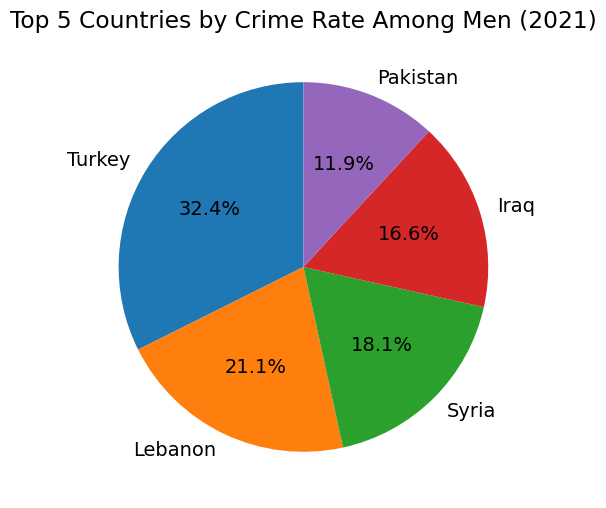

In [ ]:
import ipywidgets as widgets
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Your DataFrame loading and preparation code here

def plot_pie_chart(gender, selected_year):
    # Ensure you use the correct DataFrame name and column names
    filtered_data = inc_api[(inc_api['KOEN'] == gender) & 
                            (inc_api['IELAND'] != 'Total') & 
                            (inc_api['IELAND'] != 'Denmark') & 
                            (inc_api['IELAND'] != 'Other countries, non-western') & 
                            (inc_api['IELAND'] != 'Other countries, total') & 
                            (inc_api['TID'].astype(int) == selected_year)]
    top_countries = filtered_data.groupby('IELAND')['INDHOLD'].sum().nlargest(5)
    
    plt.figure(figsize=(10, 6))
    top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=90, ylabel='', 
                       title=f'Top 5 Countries by Crime Rate Among {gender} ({selected_year})')
    plt.show()

def on_gender_year_selected(change):
    clear_output(wait=True)
    display(gender_dropdown)  # Redisplay the dropdown to ensure it persists after clearing the output
    display(year_slider)  # Display the year slider
    plot_pie_chart(gender_dropdown.value, year_slider.value)

gender_dropdown = widgets.Dropdown(options=['Men', 'Women'], description='Gender:')
year_slider = widgets.IntSlider(description='Year', min=2017, max=2022, value=2017)

gender_dropdown.observe(on_gender_year_selected, names='value')
year_slider.observe(on_gender_year_selected, names='value')

display(gender_dropdown)
display(year_slider)

plot_pie_chart('Men', 2017)  # Default display


Dropdown(description='Gender:', options=('Men', 'Women'), value='Men')

<Figure size 1000x600 with 0 Axes>

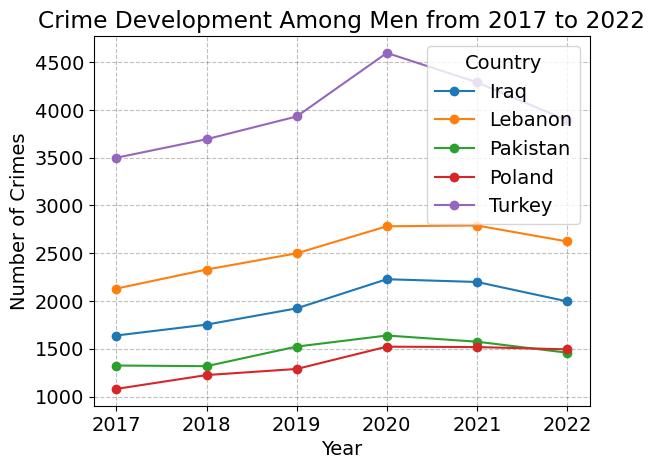

In [58]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

def plot_crime_development(gender):
    # Step 1: Filter by gender and year
    filtered_data = inc_api[(inc_api['KOEN'] == gender) & (inc_api['TID'].between(2017, 2022))]
    
    # Step 2: Further filter to include only the specified countries
    countries = ["Turkey", "Pakistan", "Iraq", "Poland", "Lebanon"]
    filtered_data = filtered_data[filtered_data['IELAND'].isin(countries)]
    
    # Step 3: Group by country and year, then sum
    grouped_data = filtered_data.groupby(['IELAND', 'TID'])['INDHOLD'].sum().unstack()
    
    # Step 4: Plot the data
    plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
    grouped_data.T.plot(kind='line', marker='o')  # Transpose to have years on the x-axis and countries as lines
    plt.title(f'Crime Development Among {gender} from 2017 to 2022')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    plt.grid(True)
    plt.legend(title='Country')
    plt.show()

def on_gender_selected(change):
    clear_output(wait=True)
    display(gender_dropdown)  # Redisplay the dropdown to ensure it persists after clearing the output
    plot_crime_development(change['new'])

gender_dropdown = widgets.Dropdown(options=['Men', 'Women'], description='Gender:')
gender_dropdown.observe(on_gender_selected, names='value')

display(gender_dropdown)
plot_crime_development('Men')  # Default display


In [59]:
indvan = DstApi('INDVAN')

tabsum = indvan.tablesummary(language='en')
display(tabsum)

Table INDVAN: Immigration by sex, age, citizenship, country of last residence and time
Last update: 2024-02-12T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,KØN,2,M,Men,K,Women,False
1,ALDER,126,0,0 years,125,125 years,False
2,STATSB,2,DANSK,Denmark,UDLAND,Foreign,False
3,INDVLAND,242,5901,Faroe Islands,5999,Not stated,False
4,Tid,44,1980,1980,2023,2023,True


In [16]:
# The _define_base_params -method gives us a nice template (selects all available data)
params = indvan._define_base_params(language='en')
params

{'table': 'indvan',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KØN', 'values': ['*']},
  {'code': 'ALDER', 'values': ['*']},
  {'code': 'STATSB', 'values': ['*']},
  {'code': 'INDVLAND', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [17]:
indvan_api = indvan.get_data(params=params)
indvan_api.head(900)

,KØN,ALDER,STATSB,INDVLAND,TID,INDHOLD
0,Men,9 years,Denmark,Mexico,1995,1
1,Men,9 years,Denmark,Philippines,1995,1
2,Men,21 years,Denmark,Taiwan,1995,1
3,Men,21 years,Denmark,New Zealand,1995,1
4,Men,30 years,Denmark,Thailand,1995,1
...,...,...,...,...,...,...
895,Men,23 years,Denmark,Ecuador,1995,1
896,Men,23 years,Denmark,Mexico,1995,1
897,Men,23 years,Denmark,Venezuela,1995,1
898,Men,23 years,Denmark,Iran,1995,1


In [21]:
# Ensure indvan_api is a DataFrame and drop the columns
indvan_api_cleaned = indvan_api.drop(columns=['ALDER', 'STATSB'])

# Now you can work with indvan_api_cleaned for your analysis
indvan_api_cleaned.head(1000)


,KØN,INDVLAND,TID,INDHOLD
0,Men,Mexico,1995,1
1,Men,Philippines,1995,1
2,Men,Taiwan,1995,1
3,Men,New Zealand,1995,1
4,Men,Thailand,1995,1
...,...,...,...,...
995,Men,Pakistan,1995,1
996,Men,Singapore,1995,1
997,Men,Taiwan,1995,1
998,Men,Vietnam,1995,1


Dropdown(description='Gender:', options=('Men', 'Women'), value='Men')

IntSlider(value=2020, description='Year', max=2022, min=2017)

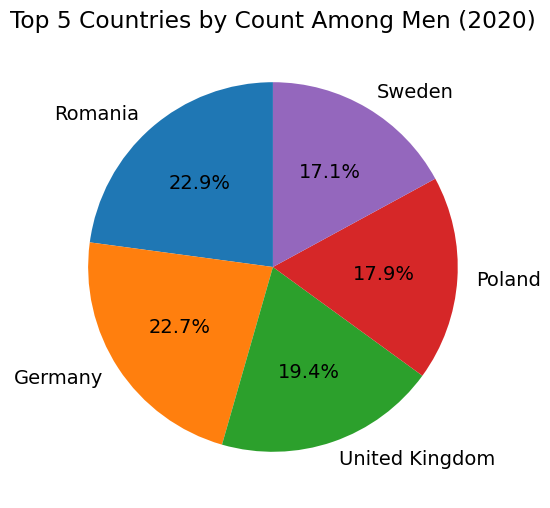

In [ ]:

def plot_pie_chart(gender, selected_year):
    # Filter the data based on the selected gender and the selected year
    filtered_data = indvan_api_cleaned[(indvan_api_cleaned['KØN'] == gender) & 
                                       (indvan_api_cleaned['TID'] == selected_year)]
    
    # Aggregate the counts by country
    top_countries = filtered_data.groupby('INDVLAND')['INDHOLD'].sum().nlargest(5)
    
    plt.figure(figsize=(10, 6))
    top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=90, ylabel='', 
                       title=f'Top 5 Countries by Count Among {gender} ({selected_year})')
    plt.show()

def on_gender_year_selected(change):
    clear_output(wait=True)
    display(gender_dropdown)  # Redisplay the dropdown to ensure it persists after clearing the output
    display(year_slider)  # Display the year slider
    plot_pie_chart(gender_dropdown.value, year_slider.value)

gender_dropdown = widgets.Dropdown(options=['Men', 'Women'], description='Gender:')
year_slider = widgets.IntSlider(description='Year', min=2017, max=2022, value=2017)

gender_dropdown.observe(on_gender_year_selected, names='value')
year_slider.observe(on_gender_year_selected, names='value')

display(gender_dropdown)
display(year_slider)

plot_pie_chart('Men', 2017)  # Default display


Dropdown(description='Gender:', options=('Men', 'Women'), value='Men')

<Figure size 1000x600 with 0 Axes>

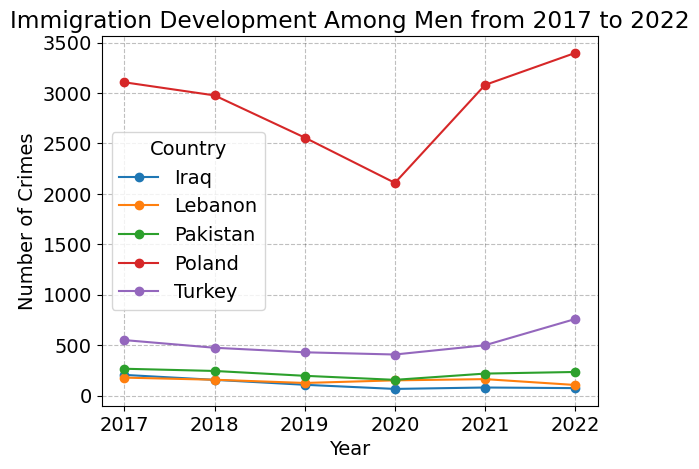

In [20]:
def plot_crime_development(gender):
    # Step 1: Filter by gender and year
    filtered_data = indvan_api_cleaned[(indvan_api_cleaned['KØN'] == gender) & (indvan_api_cleaned['TID'].between(2017, 2022))]
    
    # Step 2: Further filter to include only the specified countries
    countries = ["Turkey", "Pakistan", "Iraq", "Poland", "Lebanon"]
    filtered_data = filtered_data[filtered_data['INDVLAND'].isin(countries)]
    
    # Step 3: Group by country and year, then sum
    grouped_data = filtered_data.groupby(['INDVLAND', 'TID'])['INDHOLD'].sum().unstack()
    
    # Step 4: Plot the data
    plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
    grouped_data.T.plot(kind='line', marker='o')  # Transpose to have years on the x-axis and countries as lines
    plt.title(f'Immigration Development Among {gender} from 2017 to 2022')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    plt.grid(True)
    plt.legend(title='Country')
    plt.show()

def on_gender_selected(change):
    clear_output(wait=True)
    display(gender_dropdown)  # Redisplay the dropdown to ensure it persists after clearing the output
    plot_crime_development(change['new'])

gender_dropdown = widgets.Dropdown(options=['Men', 'Women'], description='Gender:')
gender_dropdown.observe(on_gender_selected, names='value')

display(gender_dropdown)
plot_crime_development('Men')  # Default display
